In [1]:
import pandas as pd
import numpy as np

In [2]:
google_maps_data = pd.read_csv("tourist_attractions_ireland_full_2.csv")

In [3]:
google_maps_data.head()

,Name,Rating,Latitude,Longitude,Address,Tags
0,Blarney Stone,4.6,51.929049,-8.570987,"Blarney, Cork, T23 Y598, Ireland","tourist_attraction, point_of_interest, establi..."
1,Blarney Castle & Gardens,4.7,51.929092,-8.570885,"Blarney, Cork, Ireland","tourist_attraction, park, point_of_interest, e..."
2,Rock of Cashel,4.6,52.520076,-7.890452,"St. Patricksrock, Cashel, Co. Tipperary, Ireland","tourist_attraction, point_of_interest, establi..."
3,Kilmainham Gaol,4.7,53.341870,-6.309805,"Inchicore Rd, Kilmainham, Dublin 8, D08 RK28, ...","museum, tourist_attraction, point_of_interest,..."
4,National Gallery of Ireland,4.6,53.340889,-6.252296,"Merrion Square W, Dublin 2, D02 K303, Ireland","art_gallery, tourist_attraction, store, point_..."


In [4]:
google_maps_data.isnull().sum()

Name         0
Rating       0
Latitude     0
Longitude    0
Address      0
Tags         0
dtype: int64

In [6]:
google_maps_data.describe()

,Latitude,Longitude
count,752.000000,752.000000
mean,53.255388,-7.042658
std,0.612460,1.131171
min,51.576589,-10.275395
25%,53.258924,-7.987134
50%,53.343550,-6.332686
75%,53.381003,-6.260240
max,55.281996,-5.579509


In [7]:
google_maps_data.dtypes


Name          object
Rating        object
Latitude     float64
Longitude    float64
Address       object
Tags          object
dtype: object

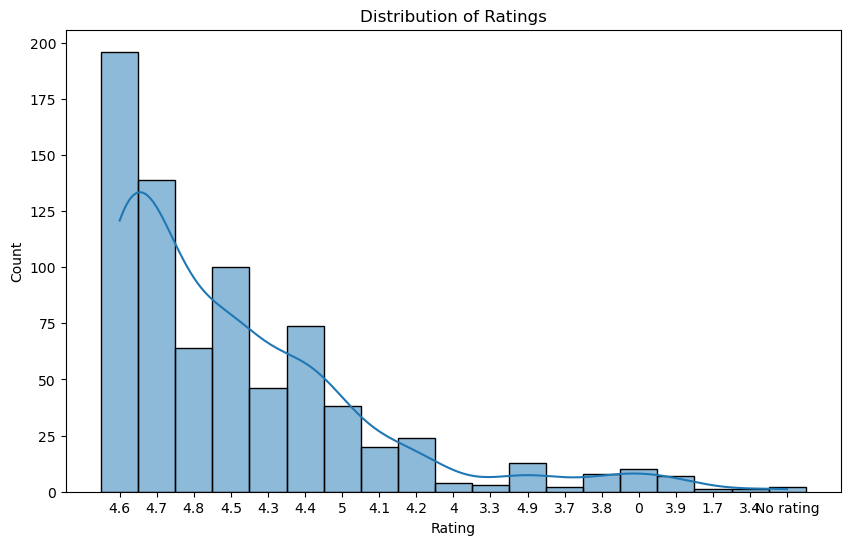

In [15]:
# Distribution Of Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(google_maps_data['Rating'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.show()

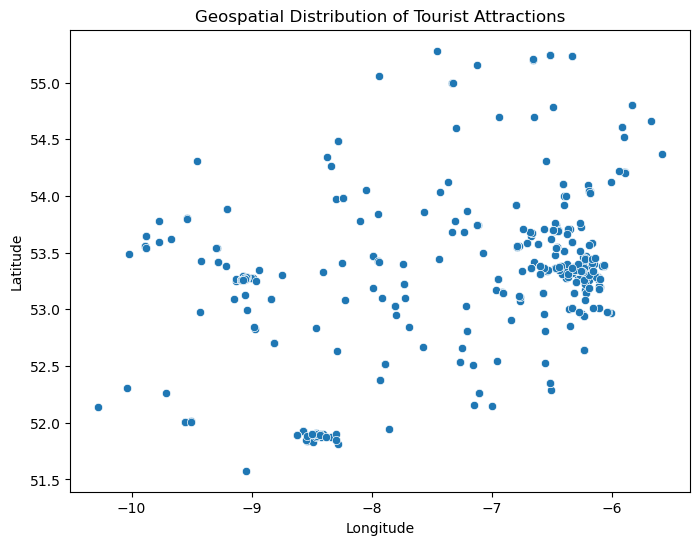

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=google_maps_data)
plt.title('Geospatial Distribution of Tourist Attractions')
plt.show()

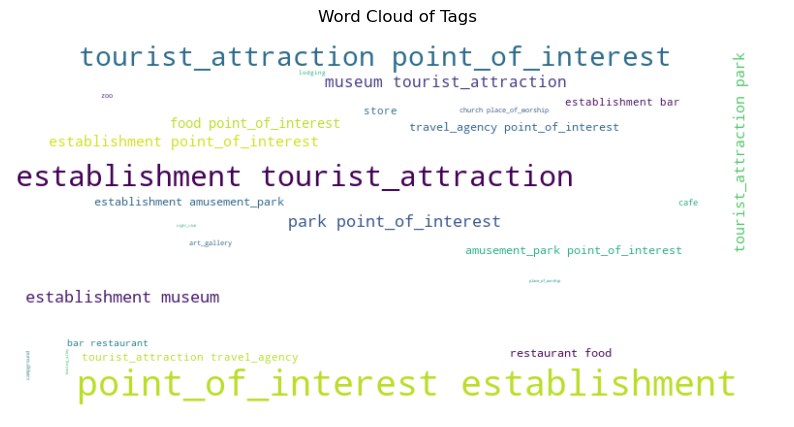

In [22]:
# Visualizing the type of tags in the dataset


from wordcloud import WordCloud

tags_combined = " ".join(google_maps_data['Tags'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()

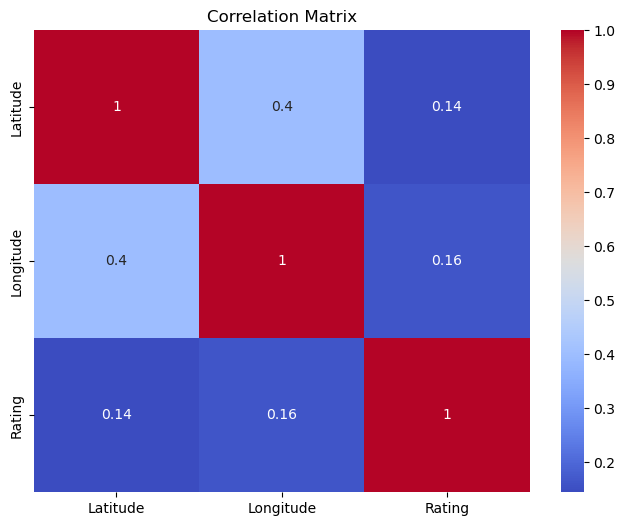

In [23]:
# Correlation between the continuous variables (Latitude, logitude, and Rating)

google_maps_data['Rating'] = pd.to_numeric(google_maps_data['Rating'], errors='coerce')  # Convert ratings to numeric
corr = google_maps_data[['Latitude', 'Longitude', 'Rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

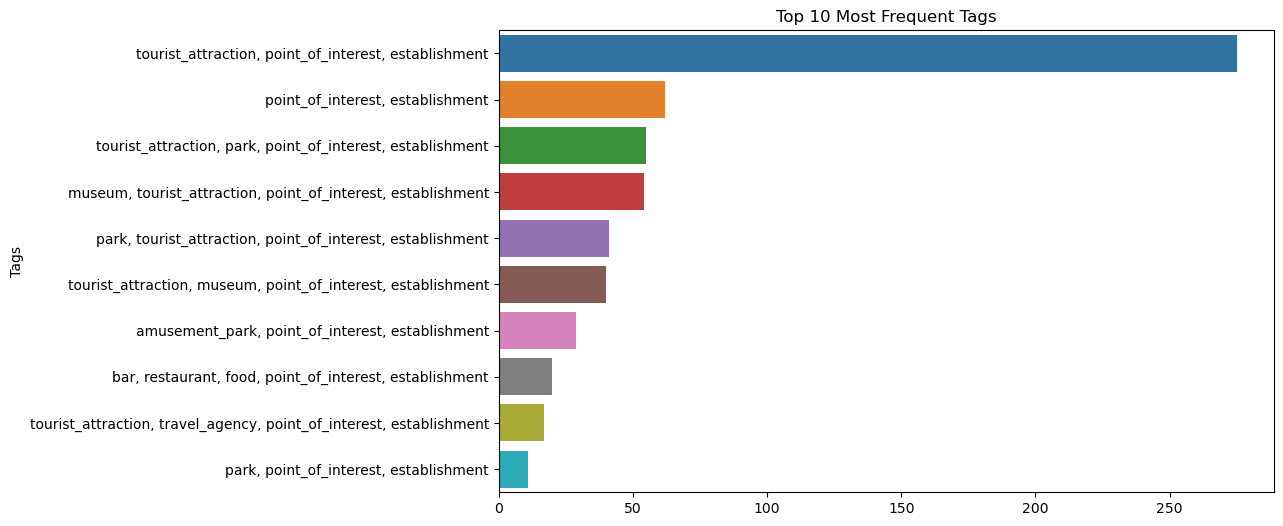

In [24]:
top_tags = google_maps_data['Tags'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 10 Most Frequent Tags')
plt.show()


In [25]:
# Top 10 TOurist Attractions according to the ratings

top_rated = google_maps_data[['Name', 'Rating', 'Address']].sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 Tourist Attractions by Rating:")
print(top_rated)


Top 10 Tourist Attractions by Rating:
                               Name  Rating  \
274  The River Corrib Spill Rainbow     5.0   
470       Wolfhound Adventure Tours     5.0   
328                       Fine Sign     5.0   
230                Stone Upon Stone     5.0   
280                   Water Station     5.0   
235         Secret Sculpture Garden     5.0   
237   Dalton's Musical History Tour     5.0   
407   Walking Food Tours - (Dublin)     5.0   
412            Viking Legacy Trails     5.0   
308                 Cork Ghost Tour     5.0   

                                               Address  
274         The Waterfront, Bridge St, Galway, Ireland  
470  64 Red Arches Rd, The Coast, Baldoyle, Co. Dub...  
328             2 St Paul's Ave, Centre, Cork, Ireland  
230       Rainsford St, The Liberties, Dublin, Ireland  
280                 Dominick St Upper, Galway, Ireland  
235     27 Frederick St S, Dublin 2, D02 EP03, Ireland  
237                Dame St, Wood Quay, Dubli